In [11]:
import os

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread

import scipy as sp

import imageio
import io

# Exercise $1-1$
Load the image dog.jpg and compute the full SVD. Choose a rank
$r < m$ and confirm that the matrix $U^{∗}U$ is the $r × r$ identity matrix. Now confirm that $UU^{∗}$ is not the identity matrix. Compute the norm of the error between
$UU^∗$ and the $n × n$ identity matrix as the rank r varies from 1 to n and plot the error.

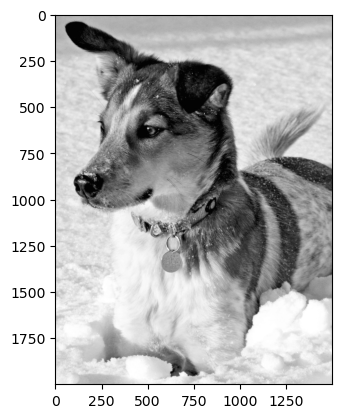

In [12]:
A = imread(os.path.join("..", "DATA", "dog.jpg"))

X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')

U, S, VT = np.linalg.svd(X, full_matrices=True)
S = np.diag(S)

In [13]:
U.shape, S.shape, VT.shape

((2000, 2000), (1500, 1500), (1500, 1500))

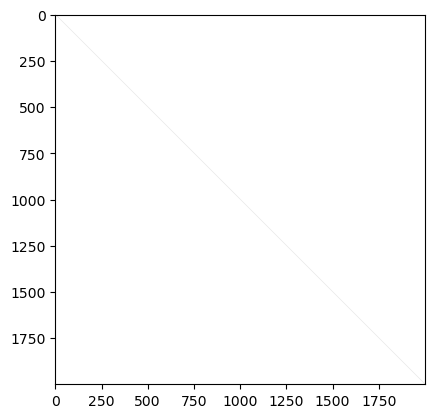

In [14]:
A_1 = (U.T) @ U
A_1[A_1 < 10e-15] = 0
plt.imshow(A_1, cmap='Greys')
plt.show()

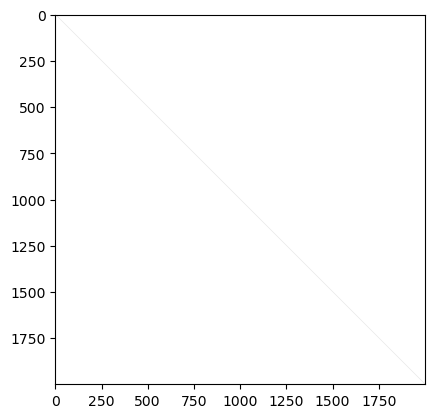

In [15]:
A_2 = U @ (U.T)
A_2[A_2 < 10e-15] = 0
plt.imshow(A_2, cmap='Greys')
plt.show()

$U^{∗}U$ and $UU^{∗}$ is indeed the identity matrix if $r = m$.

In [16]:
rank = 100
U_appox, S_approx, VT_approx = U[:,:rank], S[:rank,:rank], VT[:rank,:]

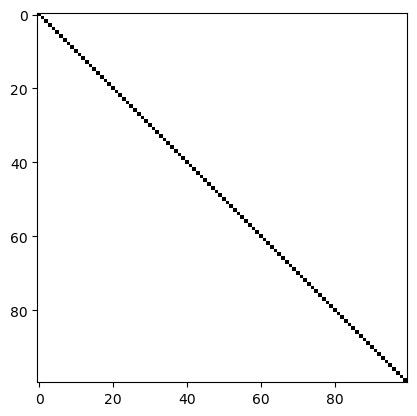

In [17]:
B_1 = U_appox.T @ U_appox
B_1[B_1 < 10e-15] = 0
plt.imshow(B_1, cmap='Greys')
plt.show()

This is the identity matrix to some treshold $\varepsilon >0$

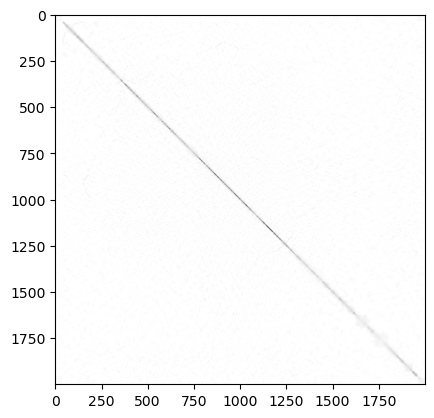

In [18]:
B_2 = U_appox @ U_appox.T
B_2[B_2 < 10e-15] = 0
plt.imshow(B_2, cmap='Greys')
plt.show()

This is clearly not the identity matrix

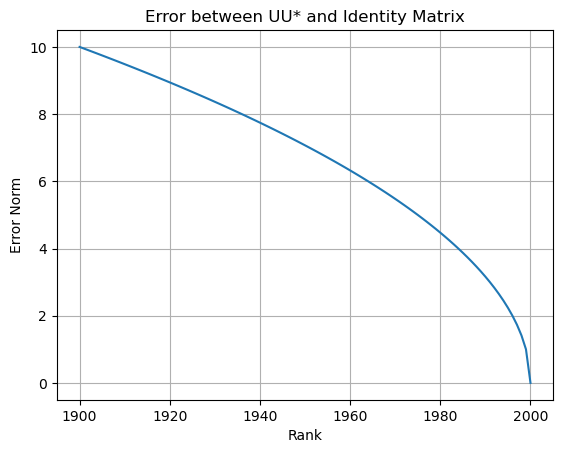

In [19]:
def compute_error(n):
    errors = []
    for rank in range(2000-100, 2000+1): #looking at the last ranks to really see the effect
        U_appox= U[:,:rank]
        U_temp = U_appox @ U_appox.T
        I = np.eye(U.shape[0])
        error = np.linalg.norm(U_temp - I, 'fro')
        errors.append(error)
    return errors

n = 100  # Replace with the desired dimension of the matrices
errors = compute_error(n)

plt.plot(range(2000-100, 2000+1), errors)
plt.xlabel('Rank')
plt.ylabel('Error Norm')
plt.title('Error between UU* and Identity Matrix')
plt.grid(True)
plt.show()

# Exercise 1-2
Load the image dog.jpg and compute the economy SVD. Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank r. Square this error to compute the fraction of missing variance as a function of r. You may also decide to plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank r. Plot these quantities along with the cumulative sum of singular values as a function of r. Find the rank r where the reconstruction captures 99% of the total variance. Compare this with the rank r where the reconstruction captures 99% in the Frobenius norm and with the rank r that captures 99% of the cumulative sum of singular values.

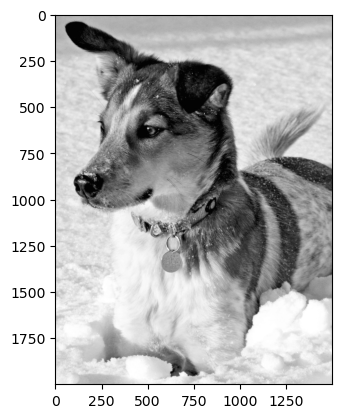

In [20]:
A = imread(os.path.join("..", "DATA", "dog.jpg"))

X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')

U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

rank_pic = np.linalg.matrix_rank(X)

In [21]:
errors = []
missing_variances = []

def relative_reconstruction_error(r):
    for i in range(1,r+1):
        U_approx, S_approx, VT_approx = U[:,:i], S[:i,:i], VT[:i,:]
        X_approx = U_approx @ S_approx @ VT_approx
        error = np.linalg.norm(X - X_approx, 'fro')/np.linalg.norm(X, 'fro')
        errors.append(error)
        missing_variances.append(error ** 2)


num_ranks = rank_pic

relative_reconstruction_error(num_ranks)

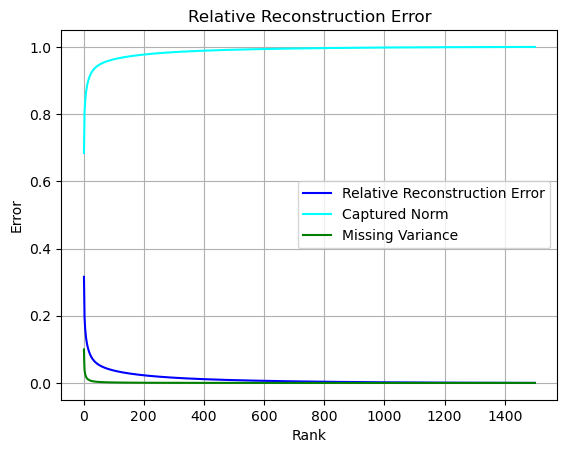

In [22]:
ranks = np.arange(1, num_ranks + 1)

# Relative reconstruction error
plt.plot(ranks, errors, color="blue", label="Relative Reconstruction Error")
plt.plot(ranks, 1 - np.array(errors), color="cyan", label="Captured Norm")
plt.plot(ranks, missing_variances, color="green", label="Missing Variance")
plt.xlabel("Rank")
plt.ylabel("Error")
plt.title("Relative Reconstruction Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

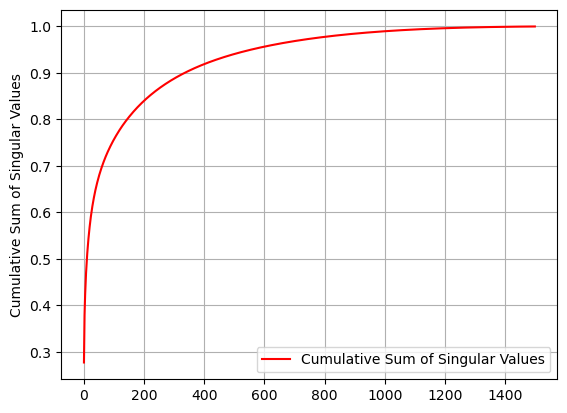

Rank capturing 99% of total variance (error): 437
Rank capturing 99% of total variance (missing variance): 16
Rank capturing 99% of total variance (cumulative sum): 1007


In [23]:
# Cumulative sum of singular values
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), color="red", label="Cumulative Sum of Singular Values")
plt.ylabel("Cumulative Sum of Singular Values")
plt.legend(loc="best")
plt.grid(True)

plt.show()

# Find ranks capturing 99% of total variance
threshold = 0.99

error_r = np.argmax(1 - np.array(errors) >= threshold) + 1
variance_r = np.argmax(np.array(missing_variances) <= 1-threshold) + 1
cumulative_r = np.argmax(np.cumsum(np.diag(S))/np.sum(np.diag(S)) >= threshold) + 1

print("Rank capturing 99% of total variance (error):", error_r)
print("Rank capturing 99% of total variance (missing variance):", variance_r)
print("Rank capturing 99% of total variance (cumulative sum):", cumulative_r)

# Exercise 1-3
Load the Yale B image database and compute the economy SVD using a standard svd command. Now compute the SVD with the method of snapshots. Compare the singular value spectra on a log plot. Compare the first 10 left singular vectors using each method (remember to reshape them into the shape of a face). Now compare a few singular vectors farther down the spectrum. Explain your findings.



In [24]:
mat_contents = sp.io.loadmat(os.path.join("..","DATA","allFaces.mat"))
faces = mat_contents["faces"]
m = int(mat_contents["m"])
n = int(mat_contents["n"])

nfaces = np.ndarray.flatten(mat_contents["nfaces"])

X = faces[:,:np.sum(nfaces[:])]

In [25]:
U, S, VT = np.linalg.svd(X, full_matrices=0)

In [26]:
corr_matrix = X.T @ X

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

In [28]:
non_negative_indices = np.where(eigenvalues > 0)[0]

In [29]:
eigenvalues = eigenvalues[non_negative_indices]

eigenvalues = np.sqrt(eigenvalues)

eigenvectors = eigenvectors[:, non_negative_indices]

In [30]:
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort the vector in descending order
eigenvalues = eigenvalues[sorted_indices]

# Rearrange the matrix columns accordingly
eigenvectors = eigenvectors[:, sorted_indices]

In [31]:
cal_U = X @ eigenvectors @ np.diag(1/eigenvalues)

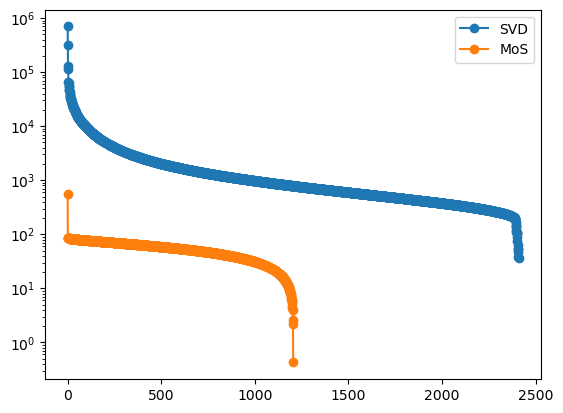

In [32]:
plt.semilogy(S,marker='o',label='SVD')
plt.semilogy(eigenvalues,marker='o', label='MoS')
plt.legend()
plt.show()

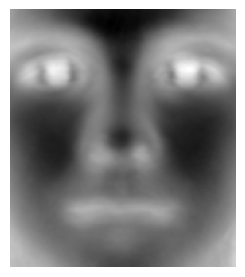

In [33]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(U[:, 0],(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')
plt.show()

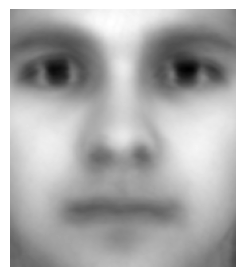

In [34]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(cal_U[:, 0],(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')
plt.show()

In [35]:
cal_U @ np.diag(eigenvalues) @ eigenvectors.T == U @ np.diag(S) @ VT

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Something is clearly wrong. The log plot of the singular values shows that the method of snapshots is not the same as the numpy svd. And the matrix multiplication of the matricies does not yeild the same result.

# Exercise 1-4
Generate a random 100×100 matrix, i.e., a matrix whose entries are sampled from a normal distribution. Compute the SVD of this matrix and plot the singular values. Repeat this 100 times and plot the distribution of singular values in a box-and-whisker plot. Plot the mean and median singular values asa function of r. Now repeat this for different matrix sizes (e.g., 50×50, 200×200, 500 × 500, 1000 × 1000, etc.)

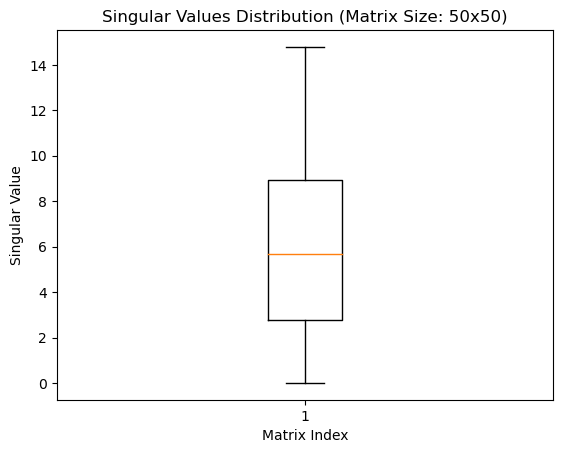

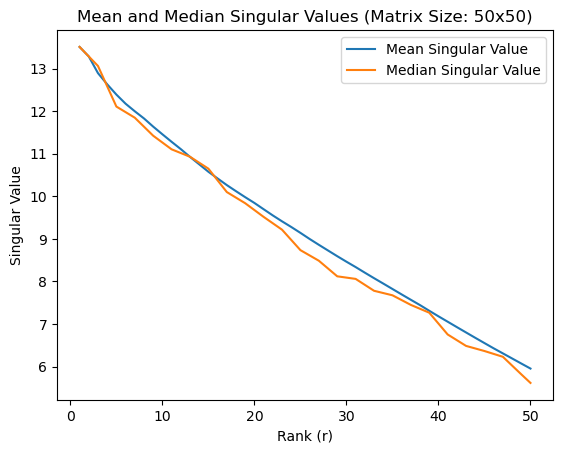

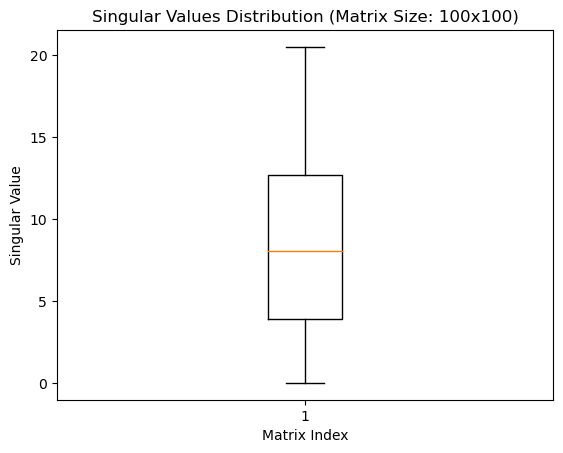

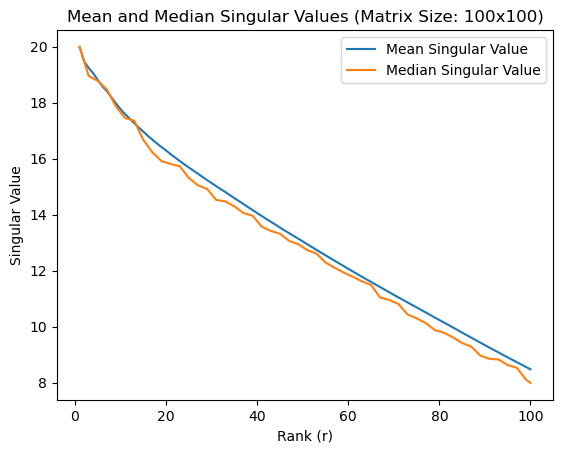

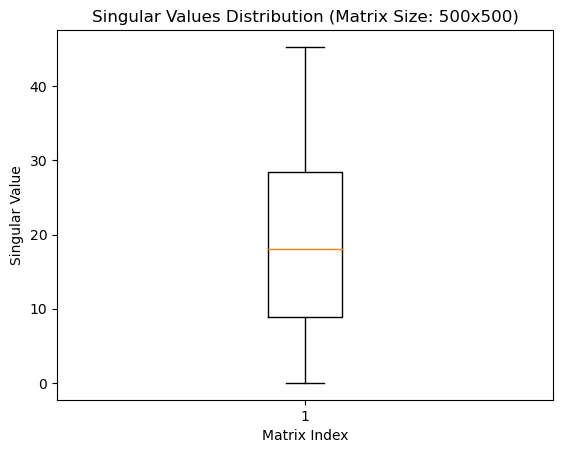

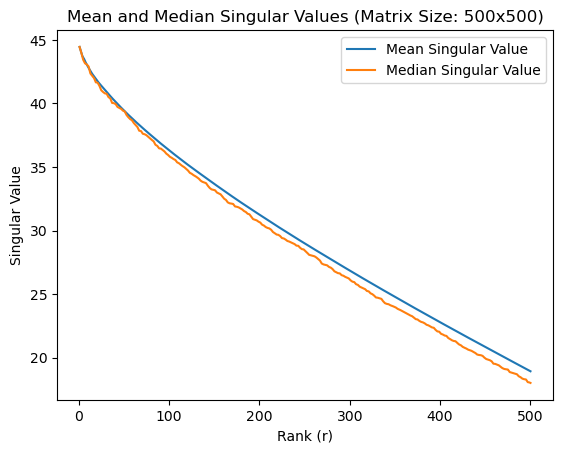

In [36]:

matrix_sizes = [50, 100, 500]  # Different matrix sizes to evaluate

for size in matrix_sizes:
    singular_values = []

    for _ in range(100):
        matrix = np.random.normal(size=(size, size))
        U, S, V = np.linalg.svd(matrix)
        singular_values.extend(S)

    plt.figure()
    plt.boxplot(singular_values)
    plt.title(f"Singular Values Distribution (Matrix Size: {size}x{size})")
    plt.xlabel("Matrix Index")
    plt.ylabel("Singular Value")

    ranks = range(1, size+1)
    mean_singular_values = []
    median_singular_values = []

    for r in ranks:
        truncated_singular_values = singular_values[:r]
        mean_singular_values.append(np.mean(truncated_singular_values))
        median_singular_values.append(np.median(truncated_singular_values))

    plt.figure()
    plt.plot(ranks, mean_singular_values, label="Mean Singular Value")
    plt.plot(ranks, median_singular_values, label="Median Singular Value")
    plt.title(f"Mean and Median Singular Values (Matrix Size: {size}x{size})")
    plt.xlabel("Rank (r)")
    plt.ylabel("Singular Value")
    plt.legend()

plt.show()




# Exercise 1-5

Compare the singular value distributions for a 1000 × 1000 uniformly distributed random matrix and a Gaussian random matrix of the same size. Adapt the Gavish–Donoho algorithm to filter uniform noise based on this singular value distribution. Add uniform noise to a data set (either an image or the test low-rank signal) and apply this thresholding algorithm to filter the noise. Vary the magnitude of the noise and compare the results. Is the filtering good or bad?

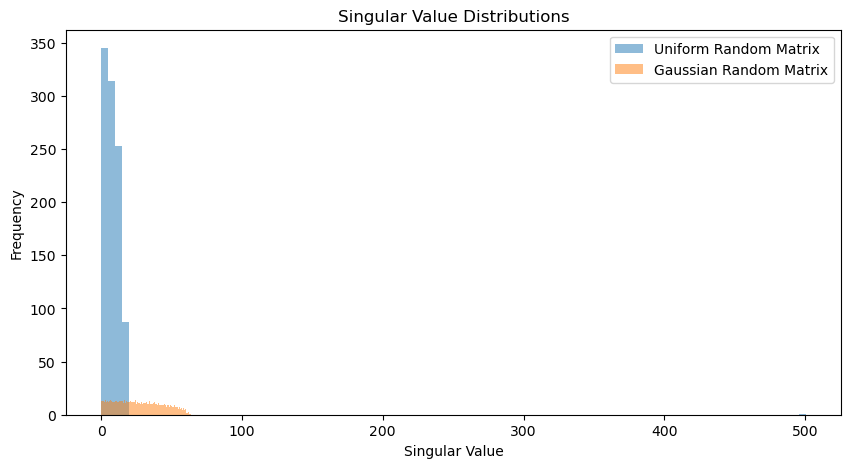

In [37]:
# Generate a 1000x1000 uniformly distributed random matrix
uniform_matrix = np.random.rand(1000, 1000)

# Generate a 1000x1000 Gaussian random matrix
gaussian_matrix = np.random.randn(1000, 1000)

# Calculate singular values for both matrices
uniform_singular_values = np.linalg.svd(uniform_matrix, compute_uv=False)
gaussian_singular_values = np.linalg.svd(gaussian_matrix, compute_uv=False)

# Plot the singular value distributions
plt.figure(figsize=(10, 5))
plt.hist(uniform_singular_values, bins=100, alpha=0.5, label='Uniform Random Matrix')
plt.hist(gaussian_singular_values, bins=100, alpha=0.5, label='Gaussian Random Matrix')
plt.xlabel('Singular Value')
plt.ylabel('Frequency')
plt.title('Singular Value Distributions')
plt.legend()
plt.show()


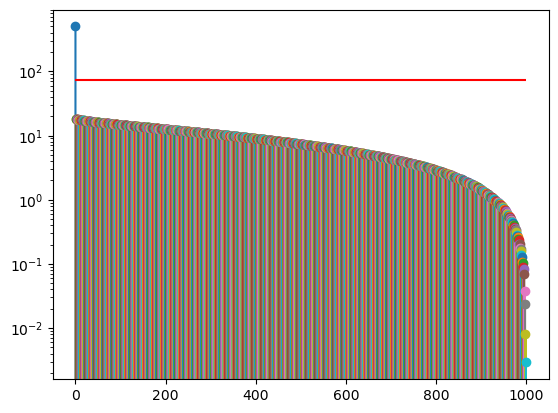

In [38]:
plt.semilogy(np.diag(uniform_singular_values),marker='o')
plt.hlines((4)/(np.sqrt(3)) * np.sqrt(uniform_matrix.shape[0]) * 1,0,len(np.diag(uniform_singular_values)), colors= 'r', label = 'Closed threshold')
plt.show()

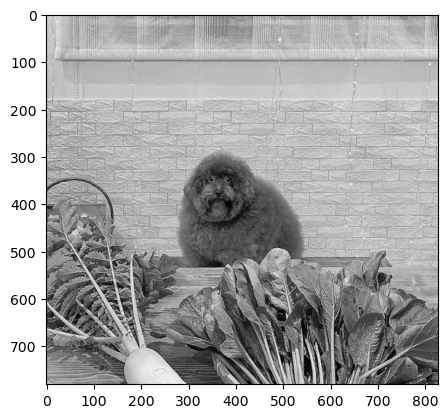

In [39]:
A = imread(os.path.join("..", "DATA", "concerned_dog.jpg"))

X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')

U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

Note that this is not a square "matrix". But it's approximatly one.

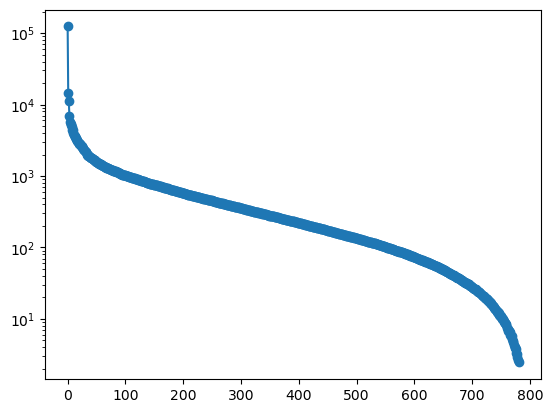

In [40]:
plt.semilogy(np.diag(S),marker='o')
plt.show()

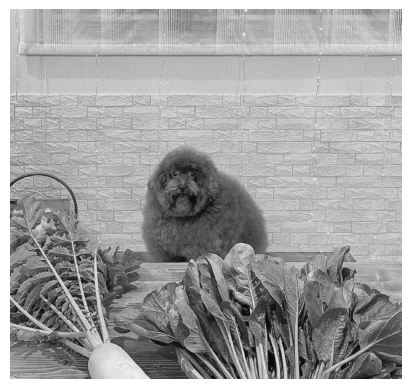

In [41]:
sigma = 10 # add noise to the data
X_prime = X + sigma*np.random.uniform(size = X.shape)

U_prime, S_prime, VT_prime = np.linalg.svd(X, full_matrices=False)

plt.imshow(X_prime)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

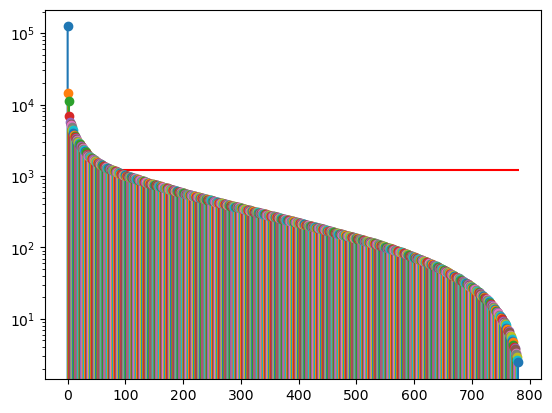

In [42]:
beta = X.shape[0]/X.shape[1]

def lambda_func(beta):
    return np.sqrt(2*(beta+1) + (8*beta)/(beta+1) + (beta**2 + 14*beta + 1)/(beta+1)**(1/2))

threshold = lambda_func(beta) * np.sqrt(X.shape[0])*sigma

plt.hlines(threshold,0,len(S_prime), colors= 'r', label = 'Closed threshold')
plt.semilogy(np.diag(S_prime),marker='o')
plt.show()

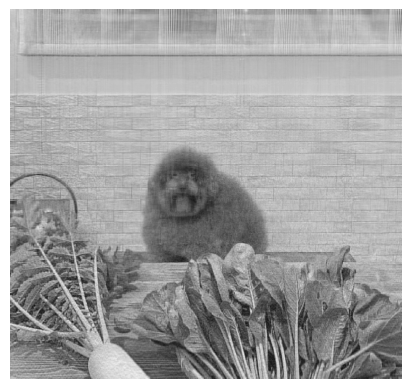

In [43]:
r = np.max(np.where(S_prime > threshold)) 

Xclean = U_prime[:,:(r+1)] @ np.diag(S_prime[:(r+1)]) @ VT_prime[:(r+1),:]

plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

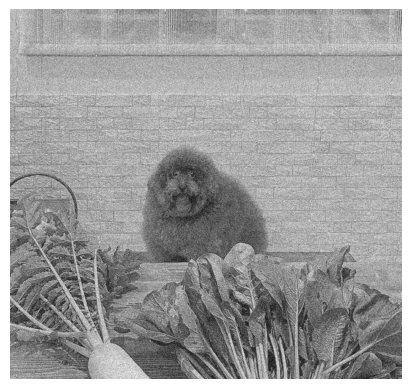

In [44]:
sigma = 100 # add noise to the data
X_prime = X + sigma*np.random.uniform(size = X.shape)

U_prime, S_prime, VT_prime = np.linalg.svd(X, full_matrices=False)

plt.imshow(X_prime)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

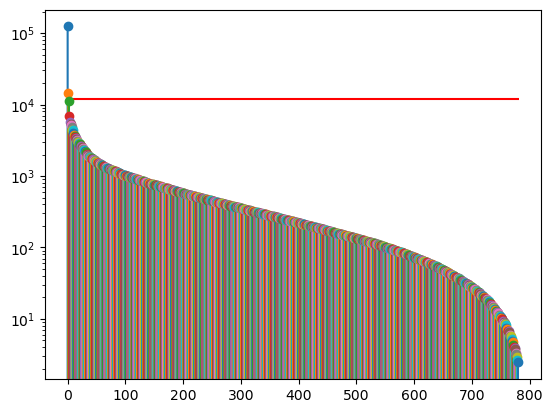

In [45]:
beta = X.shape[0]/X.shape[1]

def lambda_func(beta):
    return np.sqrt(2*(beta+1) + (8*beta)/(beta+1) + (beta**2 + 14*beta + 1)/(beta+1)**(1/2))

threshold = lambda_func(beta) * np.sqrt(X.shape[0])*sigma

plt.hlines(threshold,0,len(S_prime), colors= 'r', label = 'Closed threshold')
plt.semilogy(np.diag(S_prime),marker='o')
plt.show()

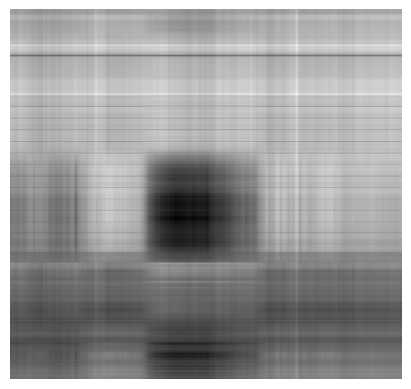

In [46]:
r = np.max(np.where(S_prime > threshold)) 

Xclean = U_prime[:,:(r+1)] @ np.diag(S_prime[:(r+1)]) @ VT_prime[:(r+1),:]

plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

It's not a good filtering method if there is alot of noise. But if there is little noise it's an "ok" method.

# Exercise 1-6

This exercise will test the concept of condition number. We will test the accuracy of solving Ax = b when noise is added to b for matrices A
with different condition numbers.

## (a)

In [47]:
n = 100

U = np.random.rand(n, n)
VT = np.random.rand(n, n)

# Create the first Σ matrix with logarithmically spaced singular values from 100 to 1
singular_values1 = np.logspace(2, 0, num=n)
Sigma1 = np.diag(singular_values1)

# Create the second Σ matrix with logarithmically spaced singular values from 100 to 10^-6
singular_values2 = np.logspace(2, -6, num=n)
Sigma2 = np.diag(singular_values2)

# Create the two A matrices
A1 = U @ Sigma1 @ VT
A2 = U @ Sigma2 @ VT

# Check the condition numbers of the A matrices
cond_num1 = max(singular_values1)/min(singular_values1)
cond_num2 = max(singular_values2)/min(singular_values2)
print(f"Condition number of A1: {cond_num1}")
print(f"Condition number of A2: {cond_num2}")

b = np.random.rand(n)


x1 = VT.T @ np.linalg.inv(Sigma1) @ U.T @ b
x2 = VT.T @ np.linalg.inv(Sigma2) @ U.T @ b

# Calculate the relative errors
relative_error1 = np.linalg.norm(A1 @ x1 - b)/np.linalg.norm(b)
relative_error2 = np.linalg.norm(A2 @ x2 - b)/np.linalg.norm(b)

print('')
print(f"Relative error of A1: {relative_error1}")
print(f"Relative error of A2: {relative_error2}")


epsilon = np.random.rand(n) * np.linalg.norm(b) * 1e-6
b_epsilon = b + epsilon

x1_epsilon = VT.T @ np.linalg.inv(Sigma1) @ U.T @ b_epsilon
x2_epsilon = VT.T @ np.linalg.inv(Sigma2) @ U.T @ b_epsilon

# Calculate the relative errors
relative_error1_epsilon = np.linalg.norm(A1 @ x1_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)
relative_error2_epsilon = np.linalg.norm(A2 @ x2_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)

print('')
print(f"Relative error of A1 with epsilon: {relative_error1_epsilon}")
print(f"Relative error of A2 with epsilon: {relative_error2_epsilon}")

Condition number of A1: 100.0
Condition number of A2: 100000000.0

Relative error of A1: 26632177.71233485
Relative error of A2: 1986241936652.035

Relative error of A1 with epsilon: 26632215.07536139
Relative error of A2 with epsilon: 1986244634349.3247


## (b)

Now repeat the experiment above with many different noise vectors $\epsilon$ and compute the distribution of the error; plot this error as a histogram
and explain the shape.

In [48]:
error_1 = []
error_2 = []

for i in range(5000):

    b = np.random.rand(n)
    epsilon = np.random.rand(n) * np.linalg.norm(b) * 1e-6
    b_epsilon = b + epsilon

    x1_epsilon = VT.T @ np.linalg.inv(Sigma1) @ U.T @ b_epsilon
    x2_epsilon = VT.T @ np.linalg.inv(Sigma2) @ U.T @ b_epsilon

    # Calculate the relative errors
    relative_error1_epsilon = np.linalg.norm(A1 @ x1_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)
    relative_error2_epsilon = np.linalg.norm(A2 @ x2_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)

    error_1.append(relative_error1_epsilon)
    error_2.append(relative_error2_epsilon)

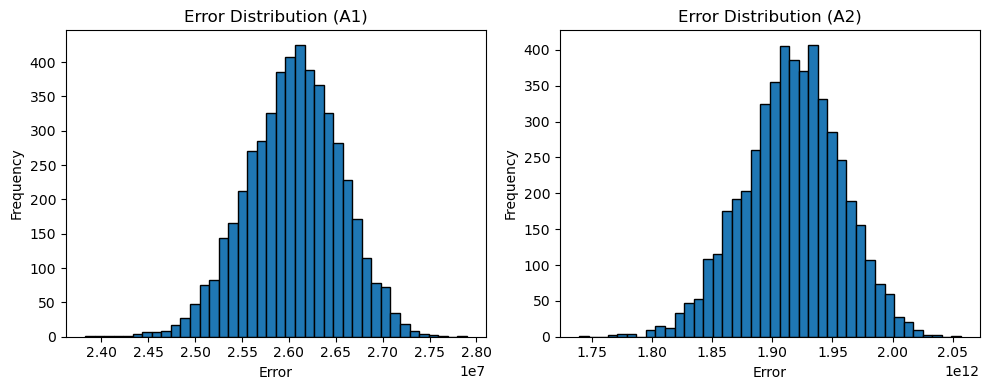

In [49]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(error_1, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A1)')

plt.subplot(1, 2, 2)
plt.hist(error_2, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A2)')

plt.tight_layout()
plt.show()

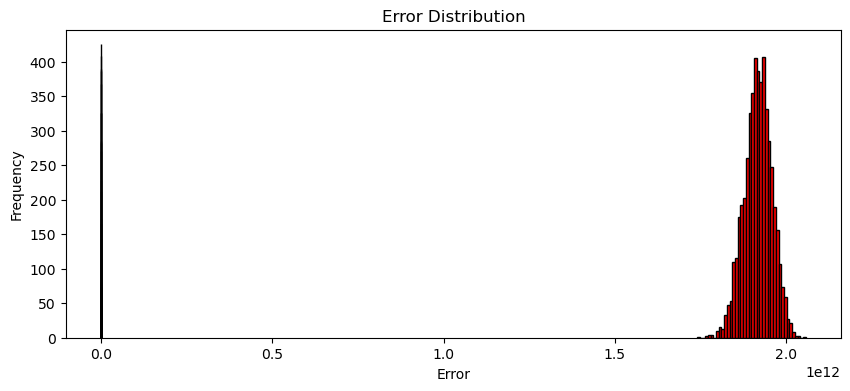

In [50]:
plt.figure(figsize=(10, 4))
plt.hist(error_1, bins=40, color = 'b', edgecolor='black')
plt.hist(error_2, bins=40, color = 'r', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

The shapes are both gaussian but they have drastically different means

## (c)

Repeat the above experiment comparing two A matrices with different singular value distributions: the first Σ will have values spaced linearly
from 100 to 1 and the second Σ will have value spaced logarithmically from 100 to 1. Does anything change? Please explain why yes or no.

In [51]:
n = 100

U = np.random.rand(n, n)
VT = np.random.rand(n, n)

# Create the first Σ matrix with logarithmically spaced singular values from 100 to 1
singular_values1 = np.linspace(100, 1, num=n)
Sigma1 = np.diag(singular_values1)

# Create the second Σ matrix with logarithmically spaced singular values from 100 to 10^-6
singular_values2 = np.logspace(2, 0, num=n)
Sigma2 = np.diag(singular_values2)

# Create the two A matrices
A1 = U @ Sigma1 @ VT
A2 = U @ Sigma2 @ VT

# Check the condition numbers of the A matrices
cond_num1 = max(singular_values1)/min(singular_values1)
cond_num2 = max(singular_values2)/min(singular_values2)
print(f"Condition number of A1: {cond_num1}")
print(f"Condition number of A2: {cond_num2}")



error_1 = []
error_2 = []

for i in range(5000):

    b = np.random.rand(n)
    epsilon = np.random.rand(n) * np.linalg.norm(b) * 1e-6
    b_epsilon = b + epsilon

    x1_epsilon = VT.T @ np.linalg.inv(Sigma1) @ U.T @ b_epsilon
    x2_epsilon = VT.T @ np.linalg.inv(Sigma2) @ U.T @ b_epsilon

    # Calculate the relative errors
    relative_error1_epsilon = np.linalg.norm(A1 @ x1_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)
    relative_error2_epsilon = np.linalg.norm(A2 @ x2_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)

    error_1.append(relative_error1_epsilon)
    error_2.append(relative_error2_epsilon)

Condition number of A1: 100.0
Condition number of A2: 100.0


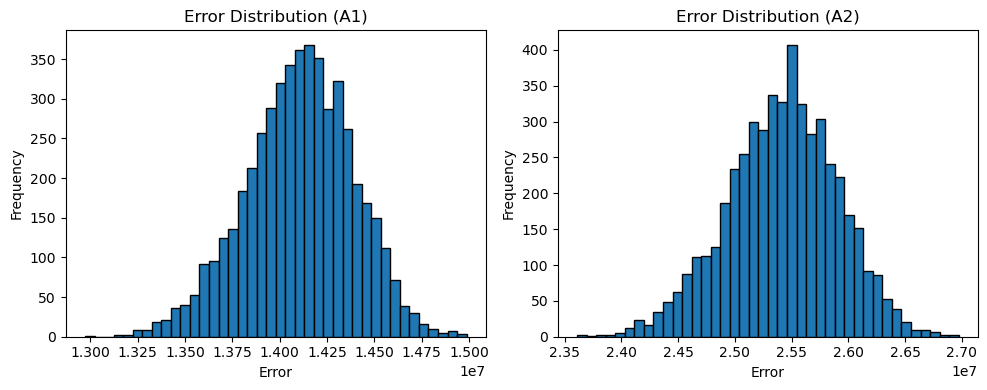

In [52]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(error_1, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A1)')

plt.subplot(1, 2, 2)
plt.hist(error_2, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A2)')

plt.tight_layout()
plt.show()

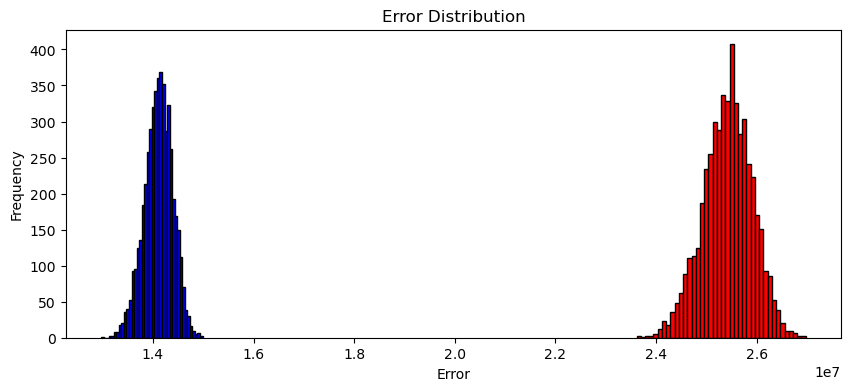

In [53]:
plt.figure(figsize=(10, 4))
plt.hist(error_1, bins=40, color = 'b', edgecolor='black')
plt.hist(error_2, bins=40, color = 'r', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

## (d)

Repeat the above experiment, but now with an A matrix that has size 100 × 10. Explain any changes.

In [54]:
m = 100
n = 10

# Generate random matrices U and V
U = np.random.rand(m, n)
VT = np.random.rand(n, n)

# Create the first Σ matrix with logarithmically spaced singular values from 100 to 1
singular_values1 = np.linspace(100, 1, num=n)
Sigma1 = np.diag(singular_values1)

# Create the second Σ matrix with logarithmically spaced singular values from 100 to 10^-6
singular_values2 = np.logspace(2, 0, num=n)
Sigma2 = np.diag(singular_values2)

# Create the two A matrices
A1 = U @ Sigma1 @ VT
A2 = U @ Sigma2 @ VT

# Check the condition numbers of the A matrices
cond_num1 = max(singular_values1)/min(singular_values1)
cond_num2 = max(singular_values2)/min(singular_values2)
print(f"Condition number of A1: {cond_num1}")
print(f"Condition number of A2: {cond_num2}")



error_1 = []
error_2 = []

for i in range(5000):
    b = np.random.rand(m)
    epsilon = np.random.rand(m) * np.linalg.norm(b) * 1e-6
    b_epsilon = b + epsilon

    x1_epsilon = VT.T @ np.linalg.inv(Sigma1) @ U.T @ b_epsilon
    x2_epsilon = VT.T @ np.linalg.inv(Sigma2) @ U.T @ b_epsilon

    # Calculate the relative errors
    relative_error1_epsilon = np.linalg.norm(A1 @ x1_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)
    relative_error2_epsilon = np.linalg.norm(A2 @ x2_epsilon - b_epsilon)/np.linalg.norm(b_epsilon)

    error_1.append(relative_error1_epsilon)
    error_2.append(relative_error2_epsilon)

Condition number of A1: 100.0
Condition number of A2: 100.0


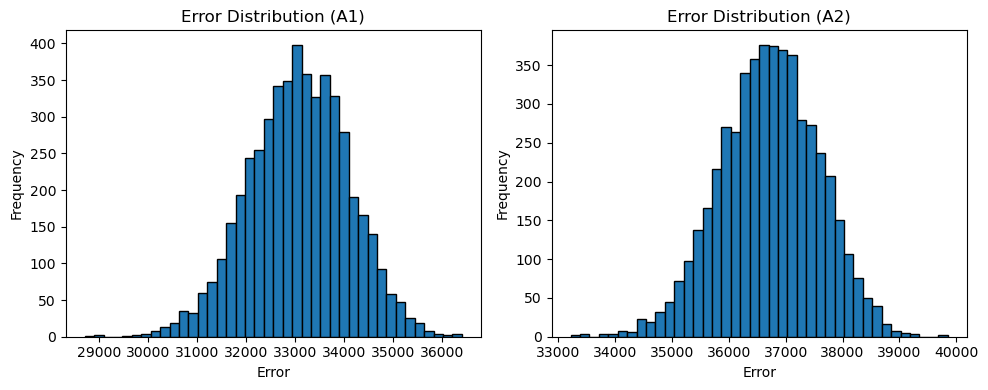

In [55]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(error_1, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A1)')

plt.subplot(1, 2, 2)
plt.hist(error_2, bins=40, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (A2)')

plt.tight_layout()
plt.show()

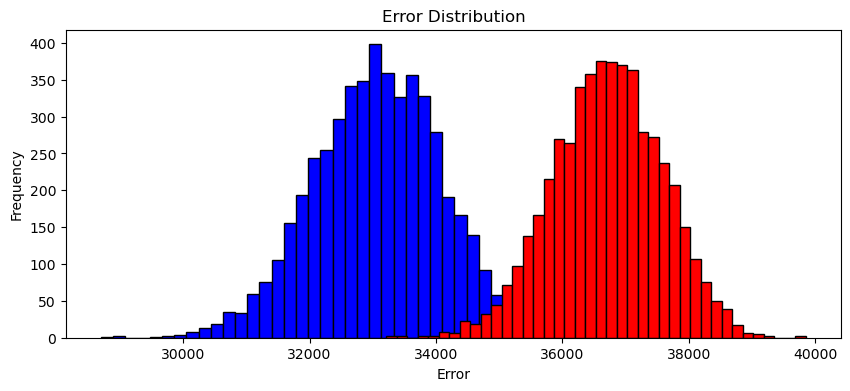

In [56]:
plt.figure(figsize=(10, 4))
plt.hist(error_1, bins=40, color = 'b', edgecolor='black')
plt.hist(error_2, bins=40, color = 'r', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

# Exercise 1-7

Load the data set for fluid flow past a cylinder (you can either download this from our book http://DMDbook.com or generate it using the IBPM code on GitHub). Each column is a flow field that has been reshaped into a vector.

## (a)

Compute the SVD of this data set and plot the singular value spectrum and the leading singular vectors. The U matrix contains eigenflow fields and the ΣV∗ represents the amplitudes of these eigenflows as the flow evolves in time.


In [57]:
vortall_mat = sp.io.loadmat(os.path.join('..','DATA','VORTALL.mat'))
X = vortall_mat['VORTALL']

In [58]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

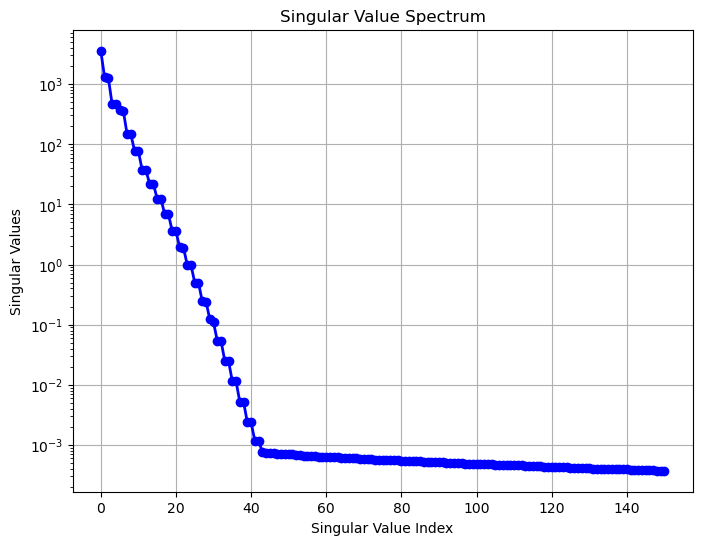

In [59]:
# Plotting singular value spectrum
plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(S) + 1), S, 'bo-', linewidth=2)
plt.semilogy(S, 'bo-', linewidth=2)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Values')
plt.title('Singular Value Spectrum')
plt.grid(True)
plt.show()

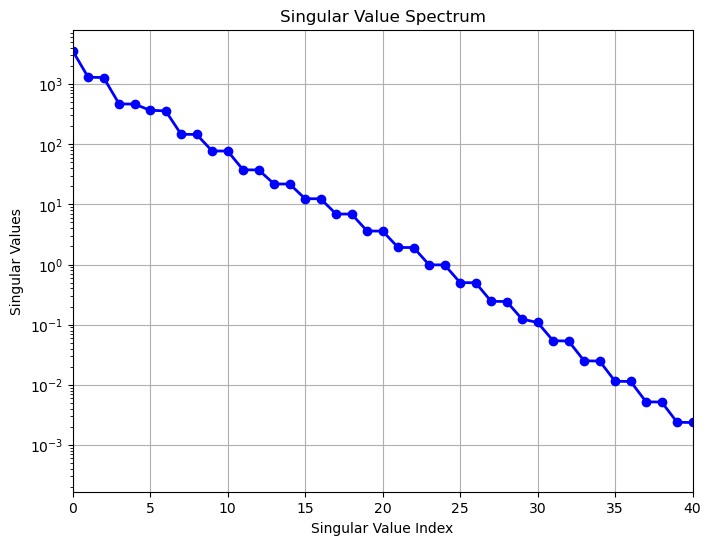

In [60]:
plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(S) + 1), S, 'bo-', linewidth=2)
plt.semilogy(S, 'bo-', linewidth=2)
plt.xlim([0, 40])
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Values')
plt.title('Singular Value Spectrum')
plt.grid(True)
plt.show()

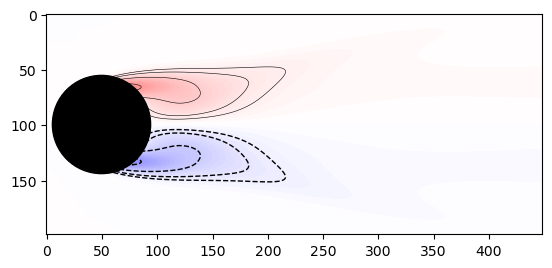

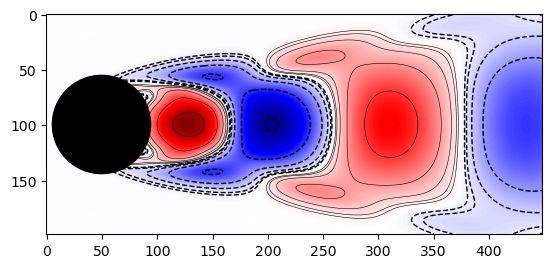

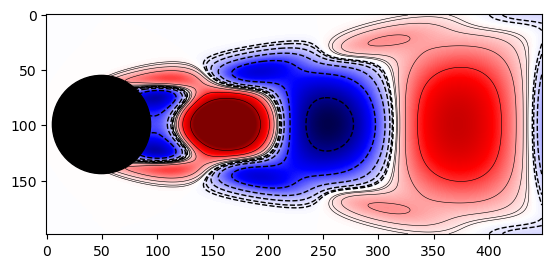

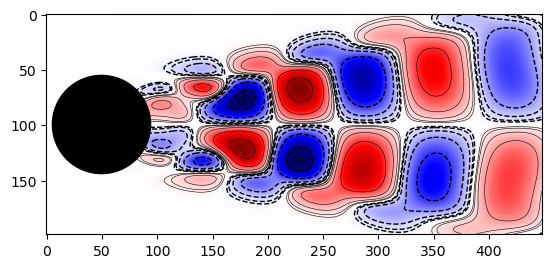

In [61]:
def plot_leading_vector(i):

    U_copy = np.copy(np.real(np.reshape(U[:,i],(449,199))))

    U_copy = U_copy.T

    vortmin = -5
    vortmax = 5

    minval = np.min(U_copy)
    maxval = np.max(U_copy)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    U_copy[U_copy > vortmax] = vortmax
    U_copy[U_copy < vortmin] = vortmin

    plt.imshow(U_copy, cmap='seismic', vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(U_copy,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(U_copy,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k') # draw cylinder

    plt.show()


plot_leading_vector(0)
plot_leading_vector(1)
plot_leading_vector(2)
plot_leading_vector(3)


## (b)

Write a code to plot the reconstructed movie for various truncation values r. Compute the r value needed to capture 90%, 99%, and 99.9% of the flow energy based on the singular value spectrum (recall that energy is given by the Frobenius norm squared). Plot the movies for each of these truncation values and compare the fidelity. Also compute the squared Frobenius norm of the error between the true matrix X and the reconstructed matrix
$\hat{X}$ , where X is the flow field movie

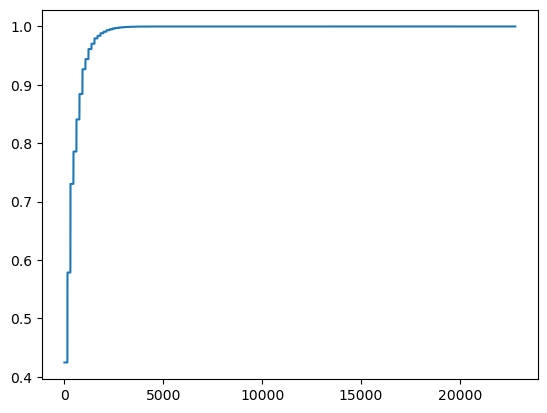

In [62]:
energy = np.cumsum(np.diag(S))/np.sum(np.diag(S))
plt.plot(energy)
plt.show()

In [63]:
threshold_90 = np.argmax(energy > 0.9)
print(threshold_90)
threshold_99 = np.argmax(energy > 0.99)
print(threshold_99)
threshold_999 = np.argmax(energy > 0.999)
print(threshold_999)

912
1976
3040


In [64]:
Xapprox_90 = U[:,:threshold_90] @ np.diag(S)[0:threshold_90,:threshold_90] @ VT[:threshold_90,:]
Xapprox_99 = U[:,:threshold_99] @ np.diag(S)[0:threshold_99,:threshold_99] @ VT[:threshold_99,:]
Xapprox_999 = U[:,:threshold_999] @ np.diag(S)[0:threshold_999,:threshold_999] @ VT[:threshold_999,:]

In [65]:
def make_gif(matrix, name):

    heatmaps = []
    # Reshape each column and plot as heatmap
    for column in range(matrix.shape[1]):
        reshaped_column = np.copy(np.real(np.reshape(matrix[:,column],(449,199))))


        reshaped_column = reshaped_column.T

        vortmin = -5
        vortmax = 5

        minval = np.min(reshaped_column)
        maxval = np.max(reshaped_column)

        if np.abs(minval) < 5 and np.abs(maxval) < 5:
            if np.abs(minval) > np.abs(maxval):
                vortmax = maxval
                vortmin = -maxval
            else:
                vortmin = minval
                vortmax = -minval

        reshaped_column[reshaped_column > vortmax] = vortmax
        reshaped_column[reshaped_column < vortmin] = vortmin

        plt.imshow(reshaped_column, cmap='seismic', vmin=vortmin,vmax=vortmax)

        cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])

        plt.contour(reshaped_column,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
        plt.contour(reshaped_column,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

        plt.scatter(49,99,5000,color='k') # draw cylinder
        
        # Save the plot as an image buffer
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        
        # Append the buffer to the list of heatmaps
        heatmaps.append(imageio.imread(buffer))
        
        # Clear the plot for the next iteration
        plt.clf()

    # Save the heatmaps as a GIF
    imageio.mimsave(name+'.gif', heatmaps, duration=0.1)

make_gif(X, 'All_Leading_Vectors')

C:\Users\Robin\AppData\Local\Temp\ipykernel_4300\410557700.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

In [66]:
make_gif(Xapprox_90, '90_Leading_Vectors')
make_gif(Xapprox_99, '99_Leading_Vectors')
make_gif(Xapprox_999, '999_Leading_Vectors')

C:\Users\Robin\AppData\Local\Temp\ipykernel_4300\410557700.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

In [67]:
frobenius_norm_squared_90 = np.linalg.norm(X-Xapprox_90, ord='fro') ** 2
print(frobenius_norm_squared_90)

frobenius_norm_squared_99 = np.linalg.norm(X-Xapprox_99, ord='fro') ** 2
print(frobenius_norm_squared_99)

frobenius_norm_squared_999 = np.linalg.norm(X-Xapprox_999, ord='fro') ** 2
print(frobenius_norm_squared_999)

1.9146715319230806e-21
1.9146715319230806e-21
1.9146715319230806e-21


## (c)
Fix a value r = 10 and compute the truncated SVD. Each column wk ∈ R10 of the matrix W = Σ˜V˜∗ represents the mixture of the first 10 eigenflows in the kth column of X. Verify this by comparing the kth snapshot of X with Uw˜ k.

In [68]:
Xapprox = U[:,:10] @ np.diag(S)[0:10,:10] @ VT[:10,:]

W = np.diag(S)[0:10,:10] @ VT[:10,:]

print(X[:,0])

print(U[:,:10] @ W[:,0])


[-5.92220e-15 -6.01624e-15 -5.92116e-15 ... -1.47386e-02 -1.36956e-02
 -1.26353e-02]
[-1.17781278e-12  1.21052226e-14  1.48152550e-15 ... -2.42257448e-02
 -2.17629543e-02 -1.92706254e-02]


In [69]:
np.linalg.norm(X[:,0] - U[:,:10] @ W[:,0]) / (np.linalg.norm(X[:,0]) + np.linalg.norm(U[:,:10] @ W[:,0]))

0.01050175192859708

As we can see they are relativitly close

## (d)

Now, build a linear regression model for how the amplitudes wk evolve
in time. This will be a dynamical system:

$$
w_{k+1} = Aw_k
$$

Create a matrix W with the first 1 through m − 1 columns of ΣV∗ andanother matrix W' with the 2 through m columns of ΣV∗. We will now try to solve for a best-fit A matrix so that

$$
W' \approx AW
$$

Compute the SVD of W and use this to compute the pseudo-inverse of W to solve for A. Compute the eigenvalues of A and plot them in the complex plane.

In [70]:
Xapprox.shape

(89351, 151)

In [71]:
W_1 = W[:,:-1]

W_2 = W[:,1:]

In [72]:
U_w1, S_w1, VT_w1 = np.linalg.svd(W_1, full_matrices=False)

In [73]:
A = W_2 @ VT_w1.T @ np.linalg.inv(np.diag(S_w1)) @ U_w1.T

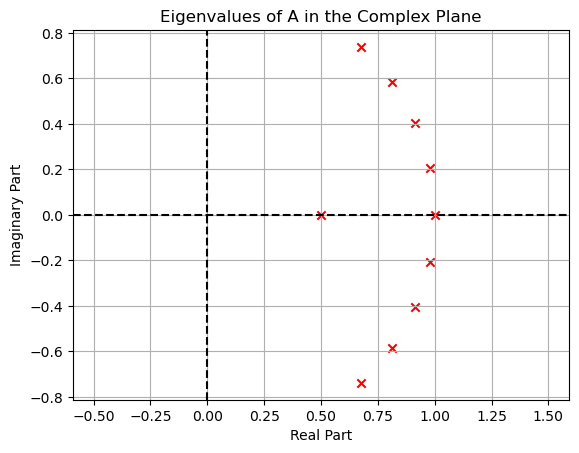

In [74]:
eigenvalues = np.linalg.eigvals(A)

# Extract the real and imaginary parts of the eigenvalues
real_parts = np.real(eigenvalues)
imaginary_parts = np.imag(eigenvalues)

# Plot the eigenvalues in the complex plane
plt.scatter(real_parts, imaginary_parts, color='red', marker='x')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of A in the Complex Plane')
plt.grid(True)
plt.axis('equal')
plt.show()

In [75]:
w_evolution = [W[:,0]]
fluid_evolution = [U[:,:10] @ W[:,0]]

for i in range(W.shape[1]-1):
    w_evolution.append(A @ w_evolution[-1])
    fluid_evolution.append(U[:,:10] @ w_evolution[-1])

w_evolution = np.array(w_evolution)
fluid_evolution = np.array(fluid_evolution)


Note that I've chosen the same number of columns as in W. This is i want to compare to the actual data but in reality since we have the dynamics we can use more steps to predict the future of the dynamic system

In [76]:
fluid_evolution.shape

(151, 89351)

In [77]:
make_gif(fluid_evolution.T, 'DOD')

C:\Users\Robin\AppData\Local\Temp\ipykernel_4300\410557700.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

In [78]:
frobenius_norm_squared_dod = np.linalg.norm(X-fluid_evolution.T, ord='fro') ** 2
print(frobenius_norm_squared_dod)

16367.417367520855
